#**Analyzing important variables via SHAP values: PART 1"

In [ ]:
## Step 1: Installing SHAP VALUES
## Step 3: Import and view the pre-treated database
## step 3: Defining the predictor and response variables
## step 4: Selection of important variables
## Step 5: splitting training and testing data
## Step 6: Training the Top 5 machine learning models
## Step 7: Shap Values
## Step 8: Comparison of important features

##**Passo 1: Instalando o SHAP VALUES**

In [ ]:
# Installing the shape value library
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Passo 2: importação e visualização do banco de dados pre-tratada**

In [ ]:
### Importing the dataset

from google.colab import files
uploaded = files.upload()

Saving dataset_final.csv to dataset_final (1).csv


In [ ]:
### Viewing the imported dataset

import pandas as pd
df = pd.read_csv("dataset_final.csv")
display (df.head())

Unnamed: 0  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  \
0           0           0           0           0           0           0   
1           1           0           0           0           0           0   
2           2           0           0           0           0           0   
3           3           1           1           1           1           0   
4           4           0           0           0           0           0   

   PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  PubchemFP872  \
0           0           0           0           0  ...             0   
1           0           0           0           0  ...             0   
2           0           0           0           0  ...             0   
3           0           0           0           0  ...             0   
4           0           0           0           0  ...             0   

   PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   PubchemFP878  PubchemFP879  PubchemFP880     pIC50  
0             0             0             0  6.474955  
1             0             0             0  7.552842  
2             0             0             0  8.000000  
3             0             0             0  7.455932  
4             0             0             0  7.823909  

[5 rows x 883 columns]

In [ ]:
## Removing uninformative variable
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df.head()

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           1           1           1           1           0           0   
4           0           0           0           0           0           0   

   PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0           0           0           0           1  ...             0   
1           0           0           0           1  ...             0   
2           0           0           0           1  ...             0   
3           0           0           0           1  ...             0   
4           0           0           0           1  ...             0   

   PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   PubchemFP878  PubchemFP879  PubchemFP880     pIC50  
0             0             0             0  6.474955  
1             0             0             0  7.552842  
2             0             0             0  8.000000  
3             0             0             0  7.455932  
4             0             0             0  7.823909  

[5 rows x 882 columns]

##**step 3: Defining the predictor and response variables**

In [ ]:
x = df.drop("pIC50", axis = 1)
y = df["pIC50"]

In [ ]:
x

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              1           1           1           1           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2924           1           0           0           0           0           0   
2925           1           1           1           1           0           0   
2926           1           0           0           0           0           0   
2927           1           1           1           1           0           0   
2928           1           1           1           1           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
2924           0           0           0           1  ...             0   
2925           0           0           0           1  ...             0   
2926           0           0           0           1  ...             0   
2927           0           0           0           1  ...             0   
2928           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2924             0             0             0             0             0   
2925             0             0             0             0             0   
2926             0             0             0             0             0   
2927             0             0             0             0             0   
2928             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
2924             0             0             0             0  
2925             0             0             0             0  
2926             0             0             0             0  
2927             0             0             0             0  
2928             0             0             0             0  

[2929 rows x 881 columns]

In [ ]:
y

0       6.474955
1       7.552842
2       8.000000
3       7.455932
4       7.823909
          ...   
2924    8.443697
2925    8.958607
2926    8.958607
2927    7.459671
2928    8.244125
Name: pIC50, Length: 2929, dtype: float64

##**step 4: Selection of important variables**

In [ ]:
### 3.1. Removing descriptors with low variance
from sklearn.feature_selection import VarianceThreshold

def remove_baixa_variancia(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
x = remove_baixa_variancia(x, threshold=0.1)
x

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP13  \
0              0           0           0           0            0   
1              0           0           0           0            1   
2              0           0           0           0            1   
3              1           1           1           1            0   
4              0           0           0           0            0   
...          ...         ...         ...         ...          ...   
2924           1           0           0           0            0   
2925           1           1           1           1            0   
2926           1           0           0           0            0   
2927           1           1           1           1            0   
2928           1           1           1           1            0   

      PubchemFP16  PubchemFP19  PubchemFP20  PubchemFP23  PubchemFP24  ...  \
0               1            1            1            0            0  ...   
1               1            1            1            0            0  ...   
2               1            1            1            0            0  ...   
3               0            1            0            0            0  ...   
4               1            1            1            0            0  ...   
...           ...          ...          ...          ...          ...  ...   
2924            1            1            0            1            1  ...   
2925            1            1            0            0            0  ...   
2926            1            1            0            1            1  ...   
2927            1            1            0            0            0  ...   
2928            1            1            0            0            0  ...   

      PubchemFP691  PubchemFP692  PubchemFP696  PubchemFP697  PubchemFP698  \
0                1             0             1             1             1   
1                1             0             1             1             1   
2                1             0             1             1             1   
3                0             0             1             1             0   
4                1             0             1             1             1   
...            ...           ...           ...           ...           ...   
2924             0             0             0             1             0   
2925             0             0             0             0             0   
2926             0             0             0             1             0   
2927             0             0             0             0             0   
2928             0             0             0             0             0   

      PubchemFP704  PubchemFP711  PubchemFP712  PubchemFP714  PubchemFP777  
0                0             0             1             0             0  
1                0             0             1             0             0  
2                0             1             1             0             0  
3                0             1             1             0             0  
4                0             0             1             0             0  
...            ...           ...           ...           ...           ...  
2924             0             0             0             0             0  
2925             0             1             0             0             0  
2926             0             0             0             0             0  
2927             0             1             0             0             0  
2928             0             1             0             0             0  

[2929 rows x 204 columns]

##**Step 5: splitting training and testing data**

In [ ]:
### Importing visualization packages for machine learning model results
import seaborn as sns


# Importing packages for splitting training and testing data
import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20, random_state=100)

x_treino1, x_val, y_treino1, y_val = train_test_split(x_treino, y_treino, test_size=0.20, random_state=102)

##**Step 5: Training top 1 best machine learning models**

# TOP 5: Random Forest

In [ ]:
# Training the model
from sklearn.ensemble import RandomForestRegressor
modelo3 = RandomForestRegressor()
modelo3.fit(x_treino1, y_treino1)

RandomForestRegressor()

In [ ]:
# To calculate SHAP values ​​for the model, we need to create an "Explainer" object
# the Explainer object will be used to evaluate a sample or dataset with

# Importing the SHAP library
import shap

# Adjusting the explainer
explainer = shap.Explainer(modelo3.predict, x_val)
# Calculando o SHAP values - demora um pouco
shap_values = explainer(x_val)

Permutation explainer: 470it [04:34,  1.64it/s]


In [ ]:
# If we simply want the feature importances as determined by the SHAP algorithm,
# we need to get the average mean value of each feature
import numpy as np
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

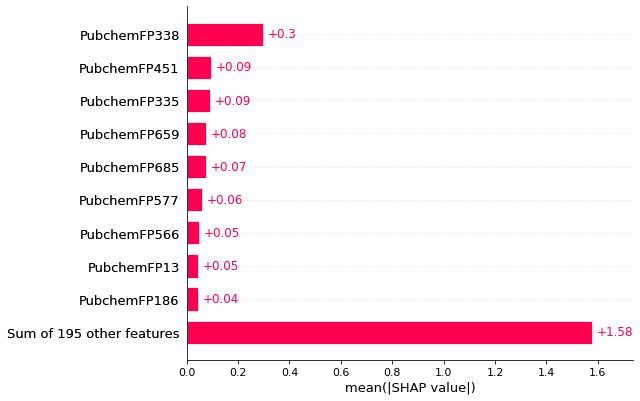

In [ ]:
# Analyzing the global effect of the features:
shap.plots.bar(shap_values)

In the graph above, the descriptors (features) are ordered from greatest to least effect on the prediction. It takes into account the absolute SHAP value, so it doesn't matter whether the feature affects the prediction positively or negatively.

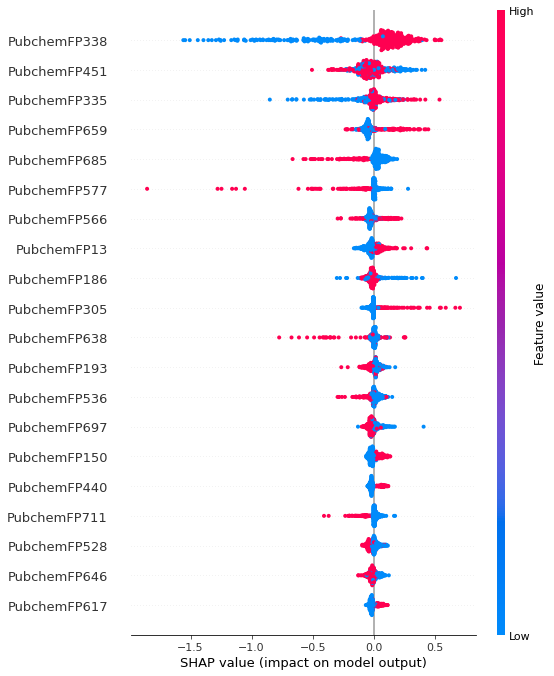

In [ ]:
# Feature importance summary chart: OPTION 1
shap.summary_plot(shap_values)

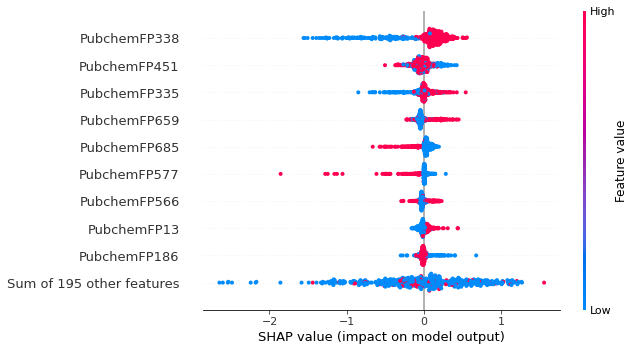

In [ ]:
# Feature importance summary chart: OPTION 2
shap.plots.beeswarm(shap_values)

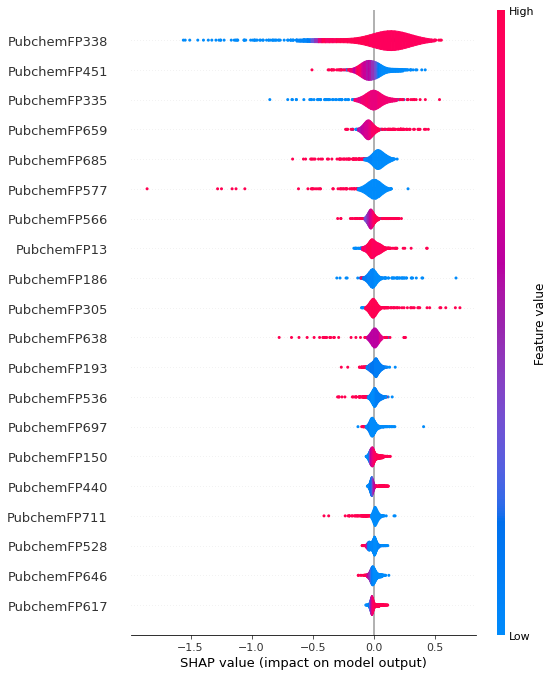

In [ ]:
# Feature importance summary chart: OPTION 3
shap.summary_plot(shap_values, plot_type='violin')

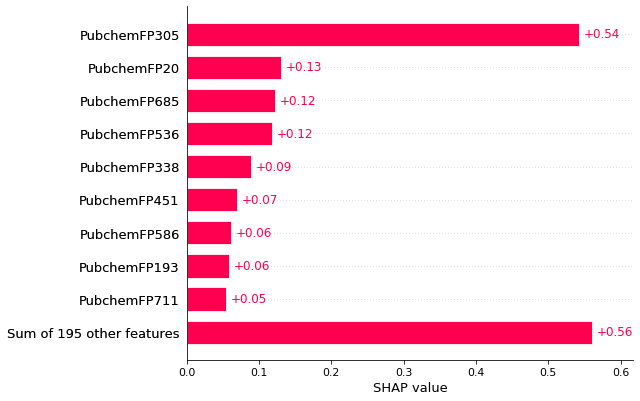

In [ ]:
# Building the local bar graph to analyze the local effect of each variable:
# This graph shows us which are the main features that affect the forecast of a...
# single sample (molecule) and the magnitude of the SHAP value for each feature.
shap.plots.bar(shap_values[0])

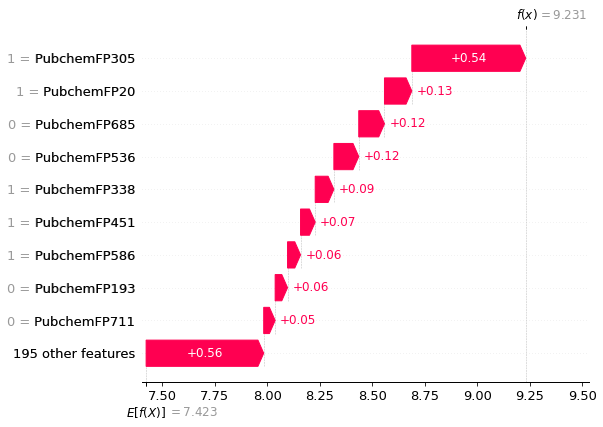

In [ ]:
# Building the Waterfall PLOT graph
# The waterfall chart we can see how the sum of all SHAP values ​​is equal to the difference
# between the prediction f(x) and the expected value E[f(x)].

shap.plots.waterfall(shap_values[0])

# Conclusions about the model

In [ ]:
### The SHAP value methodology was applied to understand the important features that impact biological activity (pIC50)
### The features that contributed most to increasing biological activity were:
### PubchemFP338(+0.09), PubchemFP13 (+0.08), PubchemFP143 (+0.06), PubchemFP579(+0.04), PubchemFP684(+0.04), PubchemFP377(+0.04)
### PubchemFP346(+0.04), PubchemFP637(+0.04), PubchemFP697(+0.04)
### These features are parts of the molecules (functional groups) responsible for biological activity against HIV
### An analysis of other machine learning algorithms is necessary to validate these features